<a href="https://colab.research.google.com/github/ronnymunthe99/RemoteSensing/blob/main/Detecting_Upwelling_Area_With_Fuzzy_C_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc
from glob import glob
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd  'drive/MyDrive/Colab Notebooks'

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks'
/content/drive/MyDrive/Colab Notebooks


In [ ]:
conversion = 272.15
paths = glob(f'./data1/*/*/*/*.nc') #folder netcdf
filenames = [path.split('/')[5][:8] for path in paths]
paths = {k:v for k,v in zip(filenames,paths)}
paths

{'20021225': './data1/mw_ir_oi/2002/359/20021225120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc',
 '20021230': './data1/mw_ir_oi/2002/364/20021230120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc',
 '20021228': './data1/mw_ir_oi/2002/362/20021228120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc',
 '20021226': './data1/mw_ir_oi/2002/360/20021226120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc',
 '20021229': './data1/mw_ir_oi/2002/363/20021229120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc',
 '20021219': './data1/mw_ir_oi/2002/353/20021219120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc',
 '20021231': './data1/mw_ir_oi/2002/365/20021231120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc',
 '20021227': './data1/mw_ir_oi/2002/361/20021227120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc',
 '20021221': './data1/mw_ir_oi/2002/355/20021221120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc',
 '20021224

In [ ]:
from datetime import timedelta, date
nama = 'Januari2020'
start_month = date(2020, 6, 1)
end_month = date(2020, 6, 30)
datee = pd.date_range(start_month,end_month).astype(str).str.replace('-','')
dates = datee
for n_date in range(1,19):
  start_month= date(start_month.year-1,start_month.month,start_month.day)
  end_month= date(end_month.year-1,end_month.month,end_month.day)
  datee = pd.date_range(start_month,end_month).astype(str).str.replace('-','')
  dates= dates.append(datee)
print(dates)

Index(['20200601', '20200602', '20200603', '20200604', '20200605', '20200606',
       '20200607', '20200608', '20200609', '20200610',
       ...
       '20020621', '20020622', '20020623', '20020624', '20020625', '20020626',
       '20020627', '20020628', '20020629', '20020630'],
      dtype='object', length=570)


In [ ]:
gambars = []
for date in dates:
    data = nc.Dataset(paths[date])
    lon = np.array(data['lon'][:])
    lat = np.array(data['lat'][:])
    gambar = np.array(data['analysed_sst'][:])[0][np.where((lat>-10)&(lat<10))][:,np.where((lon>91)&(lon<145))][:,0,:] #molluccas sea coordinate
    gambar = gambar-conversion
    gambar = cv2.flip(gambar,0)
    gambars.append(gambar)
gambars = np.array(gambars)
gambars = np.mean(gambars,axis=0)
print(gambars)

[[29.95289474 29.95657895 29.95663158 ... 30.26375439 30.26180702
  30.26017544]
 [29.95733333 29.96024561 29.9595614  ... 30.26791228 30.2644386
  30.25768421]
 [29.95633333 29.95873684 29.96001754 ... 30.26752632 30.26519298
  30.26208772]
 ...
 [28.87594737 28.88212281 28.89242105 ... 27.5882807  27.59487719
  27.59901754]
 [28.85652632 28.85994737 28.87236842 ... 27.54426316 27.54557895
  27.55059649]
 [28.83626316 28.84242105 28.85182456 ... 27.51545614 27.51235088
  27.51407018]]


In [ ]:
ayam = gambars.astype(float)
ayam[gambars<0] = np.nan
# ayam = np.isnan(gambars).sum()

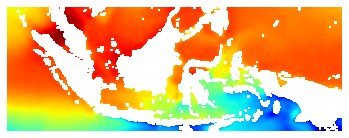

In [ ]:
plt.imshow(ayam, extent=[91, 145,-10, 10 ],cmap='jet')
plt.axis('off')
huhu = "./data1/Hasil image/"
plt.savefig(huhu + '%s' %nama, bbox_inches='tight')

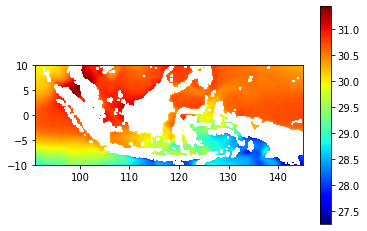

In [ ]:
pap = plt.imshow(ayam, extent=(91, 145,-10, 10),cmap='jet')
plt.colorbar(pap)
plt.axis('on')
sblm = "./data1/Hasil image/Sblm/"
plt.savefig(sblm + '%s' %nama, bbox_inches='tight')

In [ ]:
original_image = cv2.imread('data1//Hasil image/Januari2020.png')
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [ ]:
import numpy as np

def calc_median(im,seg_img,verbose):
    n = len(np.unique(seg_img))
    f_img = np.zeros_like(im,dtype=np.int64)
    segs = list(np.unique(seg_img))
    for i in range(n):
        if verbose:
            print(i)
        mask_indx = np.where((seg_img==segs[i]))
        mask = np.zeros_like(im[:,:,0],dtype=np.int64)
        mask[mask_indx] = 1
        r = im[:,:,0]
        r_med = np.median(r[mask_indx])
        g = im[:,:,1]
        g_med = np.median(g[mask_indx])
        b = im[:,:,2]
        b_med = np.median(b[mask_indx])
        f_img[:,:,0] += mask * int(r_med * 256)
        f_img[:,:,1] += mask * int(g_med * 256)
        f_img[:,:,2] += mask * int(b_med * 256)
    return f_img

def keep_center(im,seg_img,center,verbose):
    n = len(np.unique(seg_img))
    f_img = np.zeros_like(im,dtype=np.int64)
    segs = list(np.unique(seg_img))
    for i in range(n):
        if verbose:
            print(i)
        mask_indx = np.where((seg_img==segs[i]))
        mask = np.zeros_like(im[:,:,0],dtype=np.int64)
        mask[mask_indx] = 1
        f_img[:,:,0] += mask * int(center[segs[i],0] * 256)
        f_img[:,:,1] += mask * int(center[segs[i],1] * 256)
        f_img[:,:,2] += mask * int(center[segs[i],2] * 256)
    return f_img

def init_memval(cluster_n, data_n):
    U = np.random.random((cluster_n, data_n))
    val = sum(U)
    U = np.divide(U,np.dot(np.ones((cluster_n,1)),np.reshape(val,(1,data_n))))
    return U
    
def fcm(data,cluster_n,expo = 2,min_err = 0.001,max_iter = 500,verbose = 0):
    np.random.seed(0)
    U_old={}
    data_n = data.shape[0]
    U = init_memval(cluster_n, data_n)
    for i in range(max_iter):
        if verbose:
            print('Iteration: ',i)
        mf = np.power(U,expo)
        center = np.divide(np.dot(mf,data),(np.ones((data.shape[1], 1))*sum(mf.T)).T)
        diff = np.zeros((center.shape[0], data.shape[0]))
        if center.shape[1] > 1:
            for k in range(center.shape[0]):
                diff[k, :] = np.sqrt(sum(np.power(data-np.dot(np.ones((data.shape[0], 1)),np.reshape(center[k, :],(1,center.shape[1]))),2).T))
        else:	# for 1-D data
            for k in range(center.shape[0]):
                diff[k, :] = abs(center[k]-data).T
        dist=diff+0.0001;
        num = np.power(dist,(-2/(expo-1)))
        U = np.divide(num,np.dot(np.ones((cluster_n, 1)),np.reshape(sum(num),(1,num.shape[1])))+0.0001)
        U_old[i]=U;
        if i> 0:
            if abs(np.amax(U_old[i] - U_old[i-1])) < min_err:
                break
    U = np.argmax(U,axis=0)
    return U,center

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import img_as_float
    
#Loading image
img= cv2.imread('data1/Hasil image/Januari2020.png')
imeg=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
img=img_as_float(imeg)
x = np.reshape(img,(img.shape[0]*img.shape[1],3),order='F')

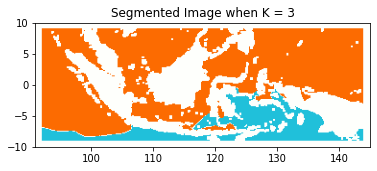

In [ ]:
cluster_n = 3
expo = 2 
min_err = 0.001 
max_iter = 500 
verbose = 0
m,c = fcm(x,cluster_n,expo,min_err,max_iter,verbose)
m = np.reshape(m,(imeg.shape[0],imeg.shape[1]),order='F')
    
#Replace pixel intensity with centers found by FCM or replace pixel intensity with median for each cluster
simg =keep_center(imeg,m,c,verbose)
# simg = fm.calc_median(img,m,verbose)
    
#Preview output image
plt.imshow(simg,extent=(91, 145,-10, 10))
plt.title('Segmented Image when K = %i' % cluster_n)
plt.axis('on')
path = "./data1/Hasil image/Fuzzy"
plt.savefig(path + '%s'%nama +' untuk k-%i' % cluster_n, bbox_inches='tight')
plt.show()

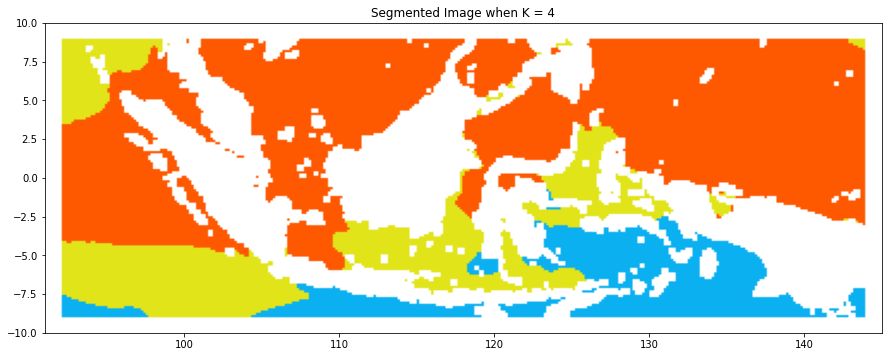

In [ ]:
cluster_n = 4
expo = 2 
min_err = 0.001 
max_iter = 500 
verbose = 0
m,c = fcm(x,cluster_n,expo,min_err,max_iter,verbose)
m = np.reshape(m,(imeg.shape[0],imeg.shape[1]),order='F')
    
#Replace pixel intensity with centers found by FCM or replace pixel intensity with median for each cluster
simg =keep_center(imeg,m,c,verbose)
# simg = fm.calc_median(img,m,verbose)
    
#Preview output image
plt.figure(figsize=(15,7))
plt.imshow(simg,extent=(91, 145,-10, 10))
plt.title('Segmented Image when K = %i' % cluster_n)
plt.axis('on')
path = "./data1/Hasil image/Fuzzy"
plt.savefig(path + '%s'%nama +' untuk k-%i' % cluster_n, bbox_inches='tight')
plt.show()

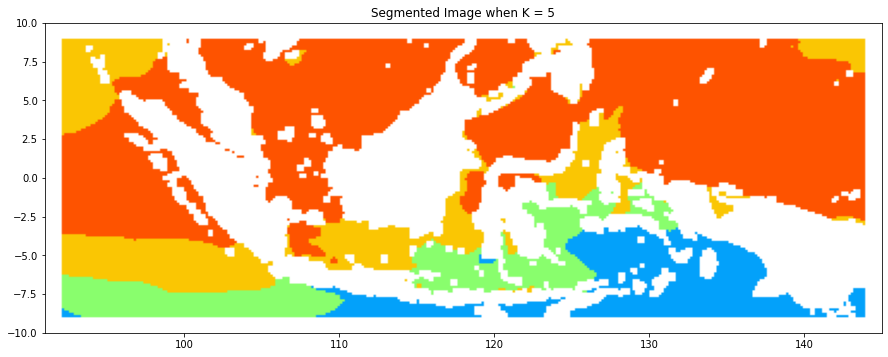

In [ ]:
cluster_n = 5
expo = 2 
min_err = 0.001 
max_iter = 500 
verbose = 0
m,c = fcm(x,cluster_n,expo,min_err,max_iter,verbose)
m = np.reshape(m,(imeg.shape[0],imeg.shape[1]),order='F')
    
#Replace pixel intensity with centers found by FCM or replace pixel intensity with median for each cluster
simg =keep_center(imeg,m,c,verbose)
# simg = fm.calc_median(img,m,verbose)
    
#Preview output image
plt.figure(figsize=(15,7))
plt.imshow(simg,extent=(91, 145,-10, 10))
plt.title('Segmented Image when K = %i' % cluster_n)
plt.axis('on')
path = "./data1/Hasil image/Fuzzy"
plt.savefig(path + '%s'%nama +' untuk k-%i' % cluster_n, bbox_inches='tight')
plt.show()

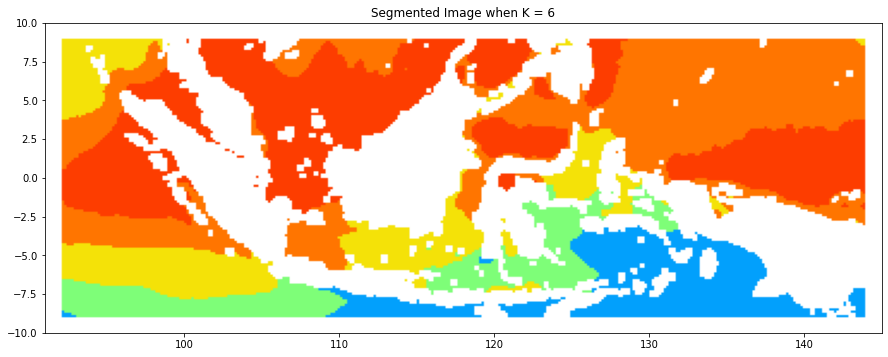

In [ ]:
cluster_n = 6
expo = 2 
min_err = 0.001 
max_iter = 500 
verbose = 0
m,c = fcm(x,cluster_n,expo,min_err,max_iter,verbose)
m = np.reshape(m,(imeg.shape[0],imeg.shape[1]),order='F')
    
#Replace pixel intensity with centers found by FCM or replace pixel intensity with median for each cluster
simg =keep_center(imeg,m,c,verbose)
# simg = fm.calc_median(img,m,verbose)
    
#Preview output image
plt.figure(figsize=(15,7))
plt.imshow(simg,extent=(91, 145,-10, 10))
plt.title('Segmented Image when K = %i' % cluster_n)
plt.axis('on')
path = "./data1/Hasil image/Fuzzy"
plt.savefig(path + '%s'%nama +' untuk k-%i' % cluster_n, bbox_inches='tight')
plt.show()

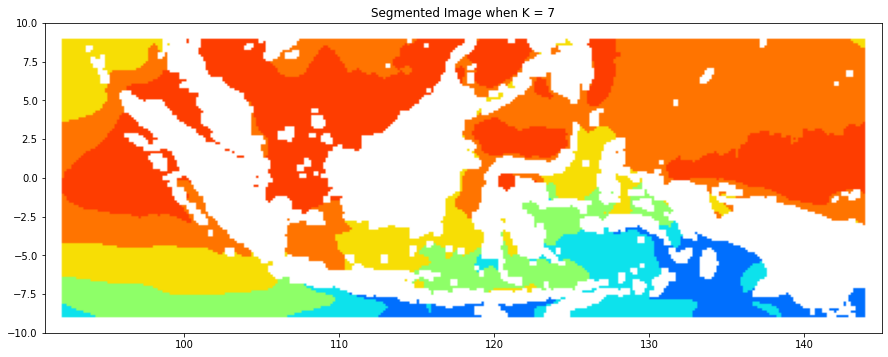

In [ ]:
cluster_n = 7
expo = 2 
min_err = 0.001 
max_iter = 500 
verbose = 0
m,c = fcm(x,cluster_n,expo,min_err,max_iter,verbose)
m = np.reshape(m,(imeg.shape[0],imeg.shape[1]),order='F')
    
#Replace pixel intensity with centers found by FCM or replace pixel intensity with median for each cluster
simg =keep_center(imeg,m,c,verbose)
# simg = fm.calc_median(img,m,verbose)
    
#Preview output image
plt.figure(figsize=(15,7))
plt.imshow(simg,extent=(91, 145,-10, 10))
plt.title('Segmented Image when K = %i' % cluster_n)
plt.axis('on')
path = "./data1/Hasil image/Fuzzy"
plt.savefig(path + '%s'%nama +' untuk k-%i' % cluster_n, bbox_inches='tight')
plt.show()

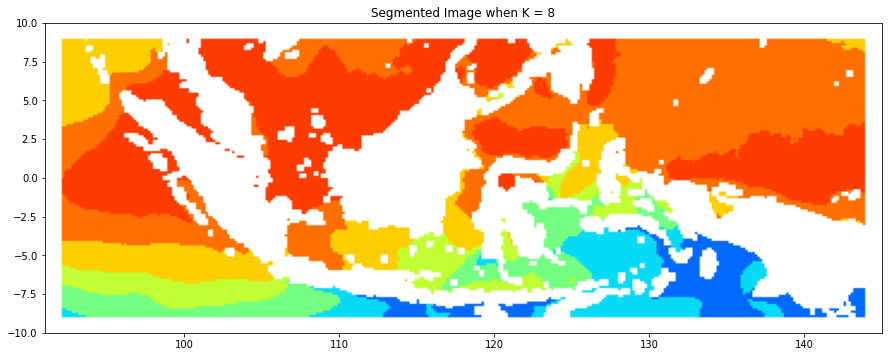

In [ ]:
cluster_n = 8
expo = 2 
min_err = 0.001 
max_iter = 500 
verbose = 0
m,c = fcm(x,cluster_n,expo,min_err,max_iter,verbose)
m = np.reshape(m,(imeg.shape[0],imeg.shape[1]),order='F')
    
#Replace pixel intensity with centers found by FCM or replace pixel intensity with median for each cluster
simg =keep_center(imeg,m,c,verbose)
# simg = fm.calc_median(img,m,verbose)
    
#Preview output image
plt.figure(figsize=(15,7))
plt.imshow(simg,extent=(91, 145,-10, 10))
plt.title('Segmented Image when K = %i' % cluster_n)
plt.axis('on')
path = "./data1/Hasil image/Fuzzy"
plt.savefig(path + '%s'%nama +' untuk k-%i' % cluster_n, bbox_inches='tight')
plt.show()

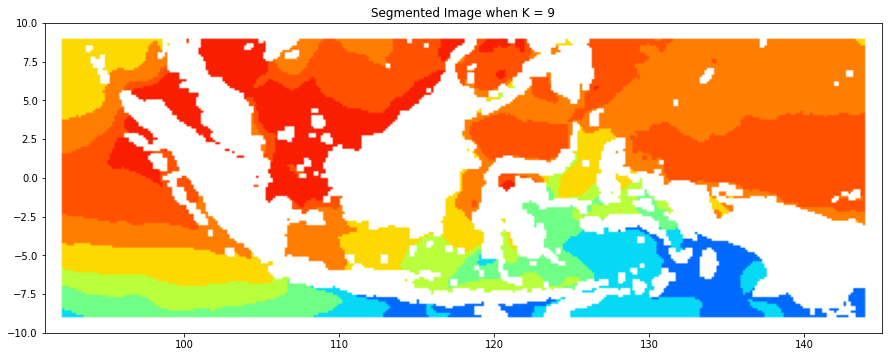

In [ ]:
cluster_n = 9
expo = 2 
min_err = 0.001 
max_iter = 500 
verbose = 0
m,c = fcm(x,cluster_n,expo,min_err,max_iter,verbose)
m = np.reshape(m,(imeg.shape[0],imeg.shape[1]),order='F')
    
#Replace pixel intensity with centers found by FCM or replace pixel intensity with median for each cluster
simg =keep_center(imeg,m,c,verbose)
# simg = fm.calc_median(img,m,verbose)
    
#Preview output image
plt.figure(figsize=(15,7))
plt.imshow(simg,extent=(91, 145,-10, 10))
plt.title('Segmented Image when K = %i' % cluster_n)
plt.axis('on')
path = "./data1/Hasil image/Fuzzy"
plt.savefig(path + '%s'%nama +' untuk k-%i' % cluster_n, bbox_inches='tight')
plt.show()

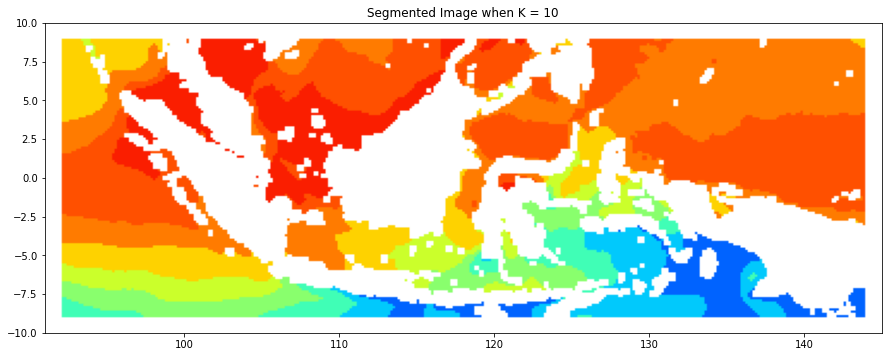

In [ ]:
cluster_n = 10
expo = 2 
min_err = 0.001 
max_iter = 500 
verbose = 0
m,c = fcm(x,cluster_n,expo,min_err,max_iter,verbose)
m = np.reshape(m,(imeg.shape[0],imeg.shape[1]),order='F')
    
#Replace pixel intensity with centers found by FCM or replace pixel intensity with median for each cluster
simg =keep_center(imeg,m,c,verbose)
# simg = fm.calc_median(img,m,verbose)
    
#Preview output image
plt.figure(figsize=(15,7))
plt.imshow(simg,extent=(91, 145,-10, 10))
plt.title('Segmented Image when K = %i' % cluster_n)
plt.axis('on')
path = "./data1/Hasil image/Fuzzy"
plt.savefig(path + '%s'%nama +' untuk k-%i' % cluster_n, bbox_inches='tight')
plt.show()

In [ ]:
! pip install fuzzy-c-means 

In [ ]:
from sklearn.metrics import silhouette_score
from fcmeans import FCM 

no_of_clusters = range(3,11)

for n_clusters in no_of_clusters:
    fcm= FCM(n_clusters= n_clusters)
    fcm_labels = fcm.fit(x) 
    fcm_labels = fcm.predict(x) 
    silhouette_avg = silhouette_score(x, fcm_labels)
    print("For no of clusters =", n_clusters," The average silhouette_score is :", silhouette_avg) 

For no of clusters = 3  The average silhouette_score is : 0.6850207717520072
For no of clusters = 4  The average silhouette_score is : 0.746004888431081
For no of clusters = 5  The average silhouette_score is : 0.7385444240064469
For no of clusters = 6  The average silhouette_score is : 0.7406200484022578
For no of clusters = 7  The average silhouette_score is : 0.7141812127174143
For no of clusters = 8  The average silhouette_score is : 0.7173590943343244
For no of clusters = 9  The average silhouette_score is : 0.721566344836167
For no of clusters = 10  The average silhouette_score is : 0.7209357898430536
